# Random Forest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

C:\Users\Radhakrishna\AppData\Local\Temp\ipykernel_13784\1770326104.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='nipy_spectral_r')


<Axes: >

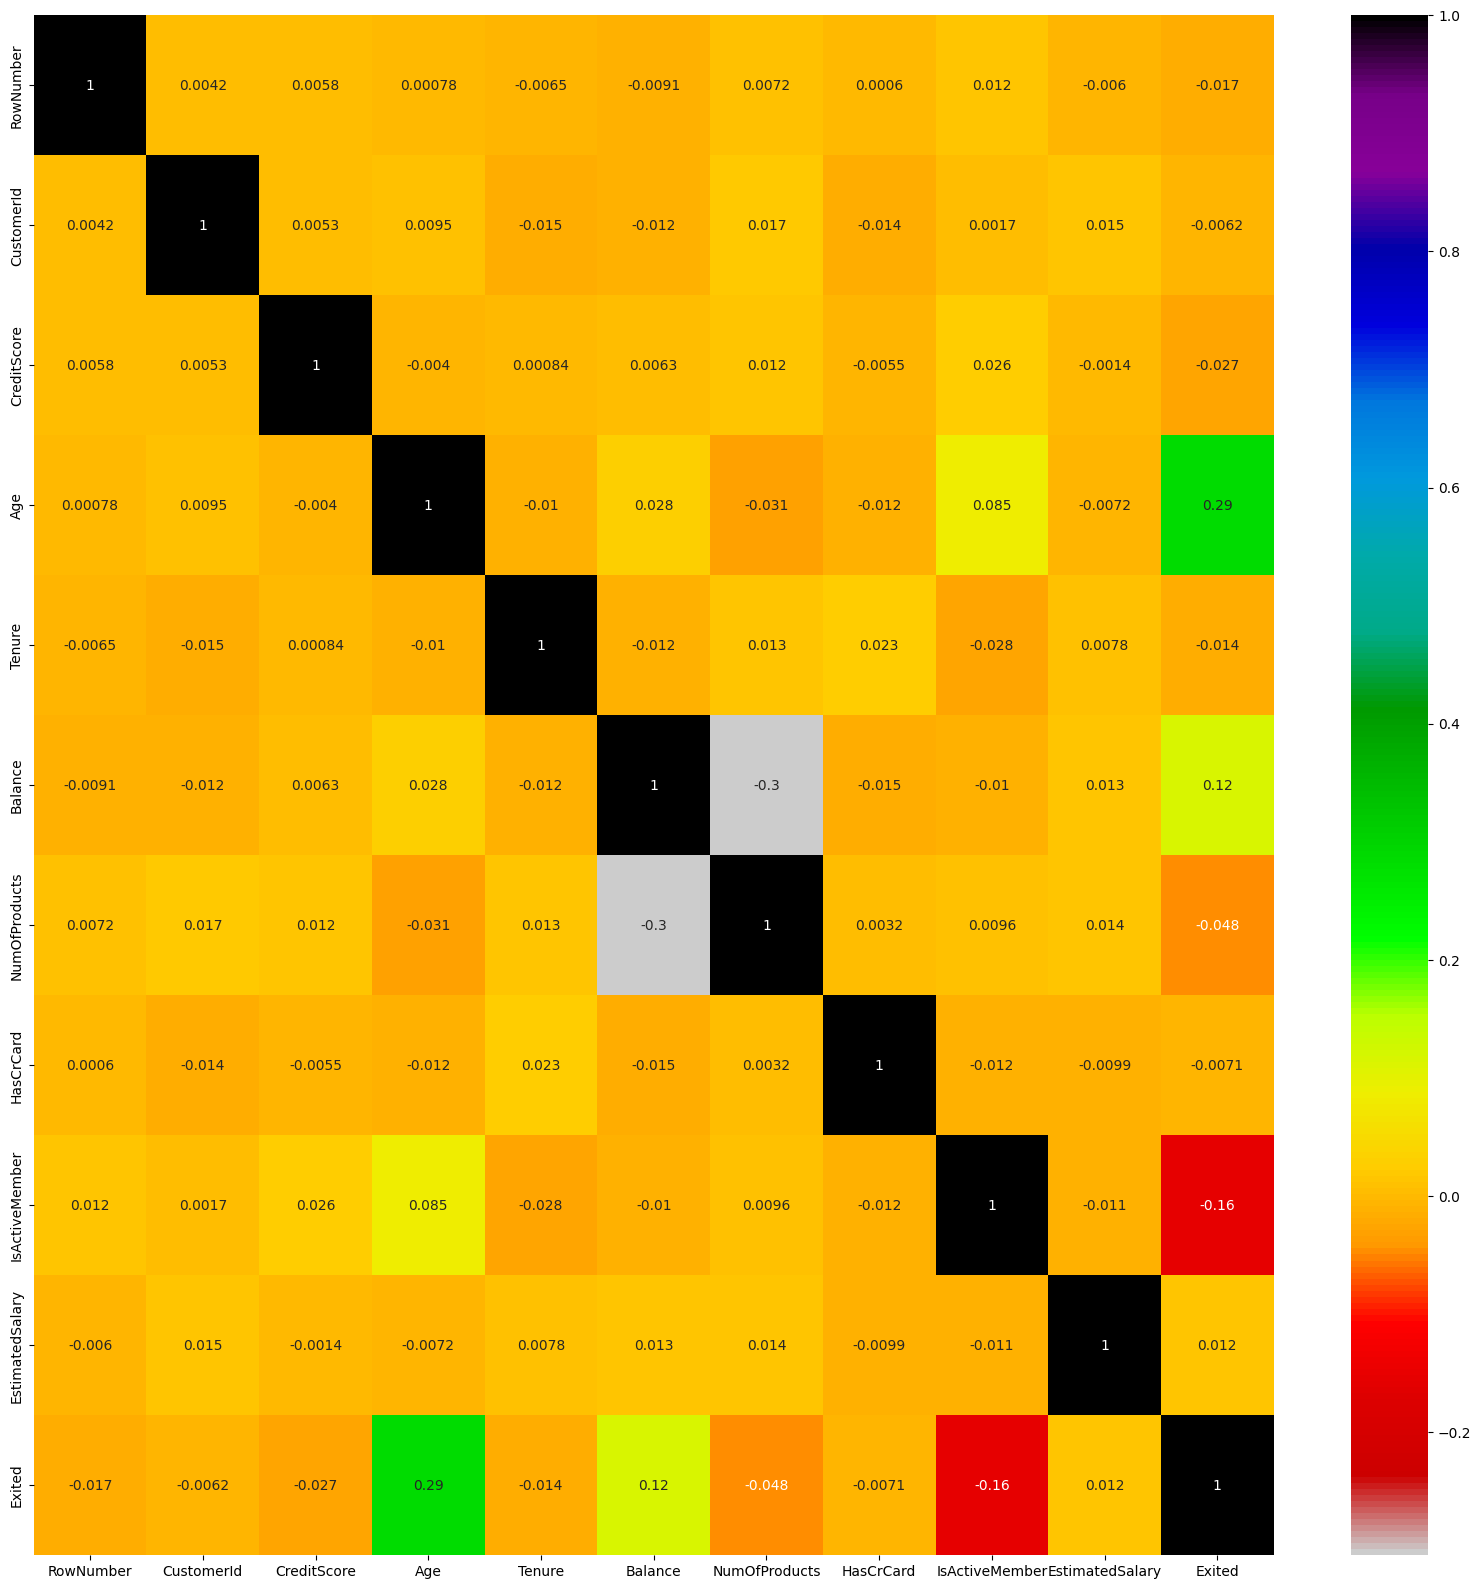

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='nipy_spectral_r')

In [6]:
#dividing the data into set of features and target

X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [7]:
#convert the text-categorical classes using either one hot encoding or pandas get_dummies
#Here Geography and Gender are text-categorical classes

print('Geography -->', X['Geography'].unique())
print('Gender -->', X['Gender'].unique())

Geography --> ['France' 'Spain' 'Germany']
Gender --> ['Female' 'Male']


In [8]:
Geography = pd.get_dummies( X['Geography'] , drop_first=True)
Geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [9]:
Gender = pd.get_dummies( X['Gender'] , drop_first=True)
Gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [10]:
X.drop(['Gender', 'Geography'], axis=1, inplace=True)

In [11]:
X = pd.concat([X, Gender, Geography], axis=1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

#### Hyperparameter tuning

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
parameters = {
                'n_estimators'  : [10, 20, 50, 100],
                'criterion'     : ["gini","entropy"]
            }

In [16]:
Random_forest_hyperparameter = GridSearchCV(estimator = RandomForestClassifier(),
                                            param_grid = parameters,
                                            cv = 5,
                                            verbose = 3)

In [17]:
Random_forest_hyperparameter.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...criterion=gini, n_estimators=10;, score=0.851 total time=   0.0s
[CV 2/5] END ...criterion=gini, n_estimators=10;, score=0.860 total time=   0.0s
[CV 3/5] END ...criterion=gini, n_estimators=10;, score=0.848 total time=   0.0s
[CV 4/5] END ...criterion=gini, n_estimators=10;, score=0.854 total time=   0.0s
[CV 5/5] END ...criterion=gini, n_estimators=10;, score=0.852 total time=   0.0s
[CV 1/5] END ...criterion=gini, n_estimators=20;, score=0.861 total time=   0.2s
[CV 2/5] END ...criterion=gini, n_estimators=20;, score=0.862 total time=   0.1s
[CV 3/5] END ...criterion=gini, n_estimators=20;, score=0.856 total time=   0.1s
[CV 4/5] END ...criterion=gini, n_estimators=20;, score=0.855 total time=   0.1s
[CV 5/5] END ...criterion=gini, n_estimators=20;, score=0.853 total time=   0.1s
[CV 1/5] END ...criterion=gini, n_estimators=50;, score=0.856 total time=   0.5s
[CV 2/5] END ...criterion=gini, n_estimators=50;,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 20, 50, 100]},
             verbose=3)

## getting the analysis of GridSearchCV

* getting the best estimator using --->    .best_estimator_

In [18]:
Random_forest_hyperparameter.best_estimator_

RandomForestClassifier()

In [19]:
Random_forest_hyperparameter.best_params_

{'criterion': 'gini', 'n_estimators': 100}

In [20]:
Random_forest_hyperparameter.best_score_

0.8646

#### creating the model using optimal parameter values

In [22]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                               criterion='gini', max_depth=None, max_features='auto',
                               max_leaf_nodes=None, max_samples=None,
                               min_impurity_decrease=0.0,
                               min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=50,
                               n_jobs=None, oob_score=False, random_state=None,
                               verbose=0, warm_start=False)

#### getting the model performance using Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
score = cross_val_score(RandomForestClassifier(), X, y , cv = 10)

In [25]:
#getting the mean of score
score.mean()

0.8640000000000001

### model accuracy = 86.15%

    no feature engineering has been done here; doing so we can increase the above accuracy

